In [ ]:
#Dataset Description:
#The dataset consists of a collection of movies with the following features:
#name: The title of the movie.
#rating: The film's rating (e.g., R, PG).
#genre: The genre of the movie (e.g., Drama, Comedy).
#year: The year the movie was produced.
#released: The release date, including the country.
#score: IMDb score (user ratings).
#votes: The number of IMDb votes the movie received.
#director: The director of the movie.
#writer: The writer of the movie.
#star: The main actor/actress of the movie.
#country: The country where the movie was produced.
#budget: The budget of the movie.
#gross: The gross revenue generated by the movie.
#company: The production company.
#runtime: The length of the movie (in minutes).

#Proposed Questions:
#1. Does a higher budget lead to higher box office returns?
#2. Does the IMDb score correlate with the movie’s box office success?
#3. What are the most successful genres in terms of box office gross and scores?
#4. How do movie runtimes influence audience ratings?

In [ ]:
Data Wrangling

In [1]:
#missing data handling
import pandas as pd

df = pd.read_csv('movies.csv')

# Show the initial number of missing values
print("Missing values before handling:")
print(df.isnull().sum())
numeric_columns = ['score', 'votes', 'budget', 'gross', 'runtime']

for col in numeric_columns:
    # Ensure columns are treated as numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')  
    # Fill missing values with the median
    df[col].fillna(df[col].median(), inplace=True) 

categorical_columns = ['rating', 'released', 'writer', 'star', 'country', 'company']
for col in categorical_columns:
    # Fill missing values with the most frequent valu
    df[col].fillna(df[col].mode()[0], inplace=True)  

# Check the number of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

df.to_csv('clean_movies.csv', index=False)


Missing values before handling:
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Missing values after handling:
name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_8004\4153947758.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8004\4153947758.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [3]:
import pandas as pd
df = pd.read_csv('clean_movies.csv')

#Find out the row and column of the dataset 
print("The shape of the dataset is :" ,df.shape)

print (df.info())

The shape of the dataset is : (7668, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


In [133]:
#Add new ' Profit ' column 

df = pd.read_csv('clean_movies.csv')

#Formula for profit
profit = df['gross'] - df['budget']

df["profit"]= profit

df.to_csv('clean_movies.csv', index=False)
print("Movies and Their Profits:")
print(df[['name', 'profit']].head())

Movies and Their Profits:
                                             name       profit
0                                     The Shining  27998772.00
1                                 The Blue Lagoon  54353106.00
2  Star Wars: Episode V - The Empire Strikes Back 520375067.00
3                                       Airplane!  79953539.00
4                                      Caddyshack  33846344.00


      runtime            runtime_category
0      146.00    Long (More than 2 hours)
1      104.00        Medium (1.5-2 hours)
2      124.00    Long (More than 2 hours)
3       88.00  Short (Less than 1.5 hour)
4       98.00        Medium (1.5-2 hours)
...       ...                         ...
7663    90.00        Medium (1.5-2 hours)
7664    90.00        Medium (1.5-2 hours)
7665   104.00        Medium (1.5-2 hours)
7666   120.00        Medium (1.5-2 hours)
7667   102.00        Medium (1.5-2 hours)

[7668 rows x 2 columns]

Summary of movies by runtime category:
runtime_category
Medium (1.5-2 hours)          5359
Long (More than 2 hours)      1420
Short (Less than 1.5 hour)     889
Name: count, dtype: int64


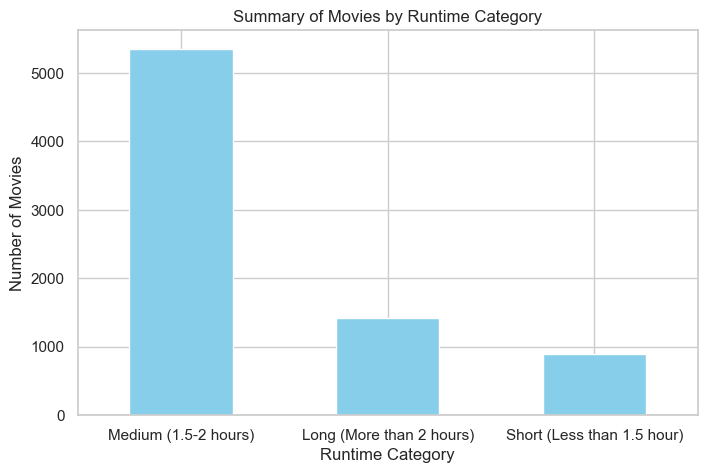

In [55]:
#runtime categorization

def categorize_runtime(runtime_value):
    if runtime_value <= 0:
        return 'Invalid Runtime'
    elif runtime_value < 90:
        return 'Short (Less than 1.5 hour)'
    elif 60 <= runtime_value <=120 :
        return 'Medium (1.5-2 hours)'
    elif runtime_value > 120:
        return 'Long (More than 2 hours)'
    else:
        return 'Unknown'
        
df['runtime_category'] = df['runtime'].apply(categorize_runtime)

print(df[['runtime', 'runtime_category']])

runtime_summary = df['runtime_category'].value_counts()

print("\nSummary of movies by runtime category:")
print(runtime_summary)

plt.figure(figsize=(8, 5))
runtime_summary.plot(kind='bar', color='skyblue')
plt.title('Summary of Movies by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.show()

df.to_csv('clean_movies.csv', index=False)

                                                name score_category
0                                        The Shining      Excellent
1                                    The Blue Lagoon        Average
2     Star Wars: Episode V - The Empire Strikes Back      Excellent
3                                          Airplane!           Good
4                                         Caddyshack           Good
...                                              ...            ...
7663                                    More to Life           Poor
7664                                     Dream Round           Poor
7665                                   Saving Mbango        Average
7666                                    It's Just Us        Average
7667                                       Tee em el        Average

[7668 rows x 2 columns]

Summary of movies by score category:
score_category
Average      4838
Good         1990
Poor          564
Excellent     276
Name: count, dtype: int64


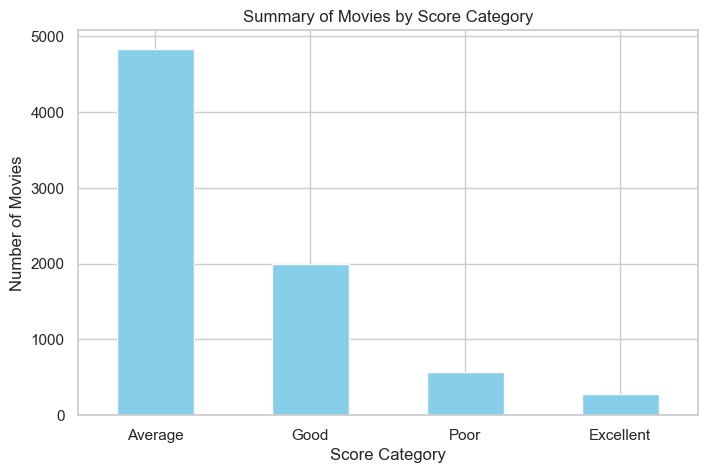

In [115]:
# Categorize scores
def categorize_score(score):
    if score >= 8.0:
        return 'Excellent'
    elif 7.0 <= score < 8.0:
        return 'Good'
    elif 5.0 <= score < 7.0:
        return 'Average'
    else:
        return 'Poor'

df['score_category'] = df['score'].apply(categorize_score)

print(df[['name', 'score_category']])

print("\nSummary of movies by score category:")
score_summary = df['score_category'].value_counts()
print(score_summary)

plt.figure(figsize=(8, 5))
score_summary.plot(kind='bar', color='skyblue')
plt.title('Summary of Movies by Score Category')
plt.xlabel('Score Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.show()

df.to_csv('clean_movies.csv', index=False)


In [113]:
import pandas as pd

df = pd.read_csv('clean_movies.csv')

# Handle incorrect numeric data
numeric_columns = ['score', 'votes', 'budget', 'gross', 'runtime','profit']

for col in numeric_columns:

     # Coerce invalid values to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce') 
    
    if col == 'score':
        
        # Make sure the range for score is from 0 to 10 
        df = df[(df['score'] >= 0) & (df['score'] <= 10)]
        
    elif col in ['budget', 'gross']:
        
        # Make sure 'budget' and 'gross' are not negative numbers
        df = df[df[col] >= 0]
        
    elif col == 'runtime':
        
        # Make sure 'runtime' is not negative number   
        df = df[df['runtime'] >= 0]

df.to_csv('clean_movies.csv', index=False)

EDA TECHNIQUE

In [111]:
import pandas as pd

data = pd.read_csv('clean_movies.csv')
numeric_cols = ['score', 'votes', 'budget', 'gross', 'runtime', 'profit']
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate all the statistics
range_values = data[numeric_cols].max() - data[numeric_cols].min()
variance_values = data[numeric_cols].var()
std_dev_values = data[numeric_cols].std()
mean_values = data[numeric_cols].mean()
median_values = data[numeric_cols].median()
sum_values = data[numeric_cols].sum()
min_values = data[numeric_cols].min()
max_values = data[numeric_cols].max()

# Create a DataFrame with the additional statistics
stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Sum': sum_values,
    'Min': min_values,
    'Max': max_values,
    'Range': range_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

stats = stats.T
print("Statistics:")
print(stats.to_string())


Statistics:
                      score          votes              budget                gross   runtime               profit
Mean                   6.39       88086.94         31317559.92          77063697.75    107.26          45746137.83
Median                 6.50       33000.00         20500000.00          20205757.00    104.00           1751791.00
Sum                49002.00   675450689.00     240143049431.00      590924434345.00 822469.00      350781384914.00
Min                    1.90           7.00             3000.00               309.00     55.00        -158031147.00
Max                    9.30     2400000.00        356000000.00        2847246203.00    366.00        2610246203.00
Range                  7.40     2399993.00        355997000.00        2847245894.00    311.00        2768277350.00
Variance               0.94 26665402258.22 1278257554816217.75 26869485430839124.00    345.09 19405182985956396.00
Standard Deviation     0.97      163295.44         35752727.94      

In [ ]:
Data Visualization

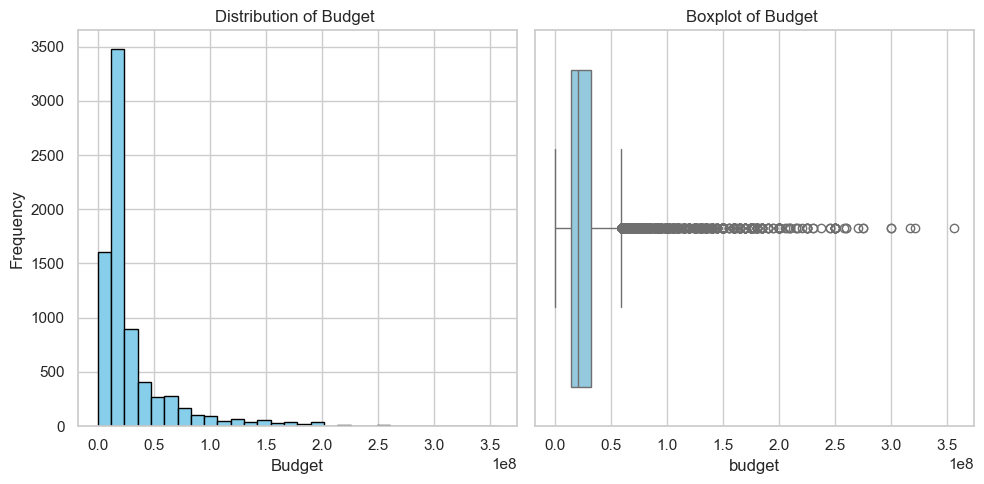

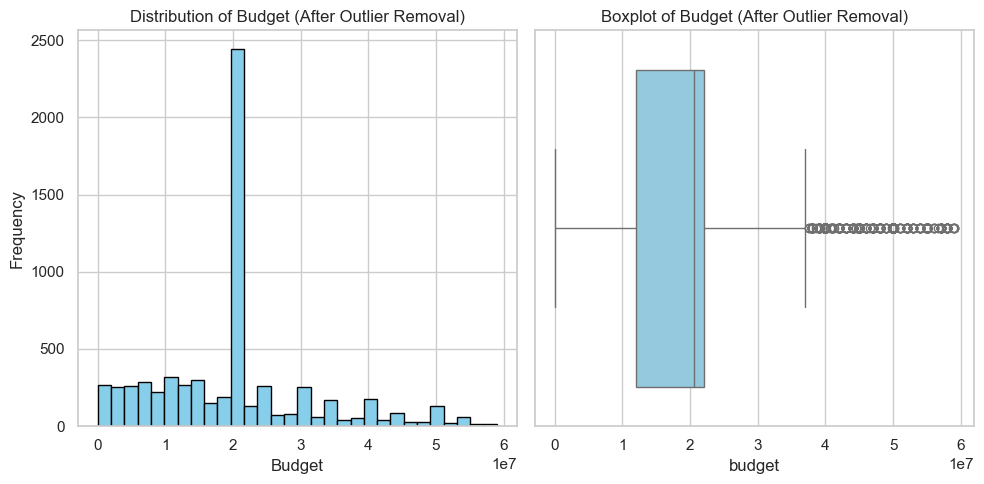

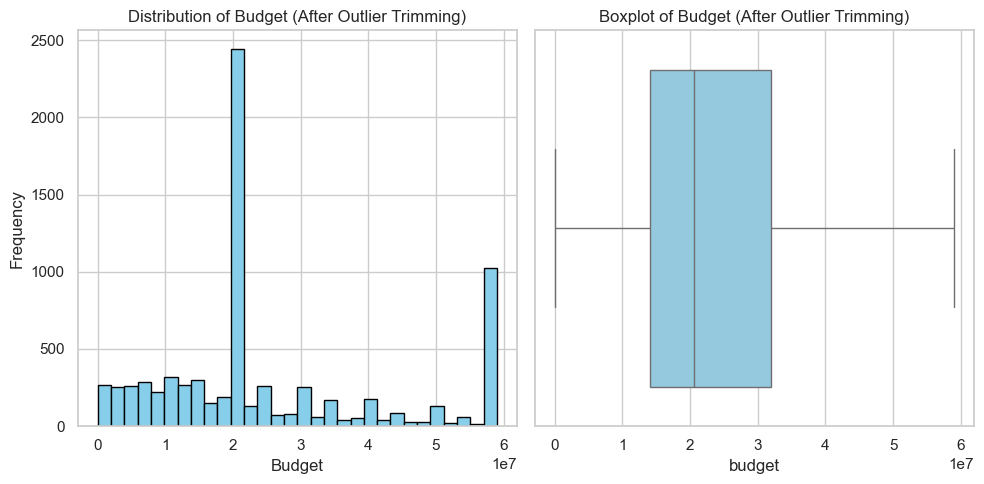

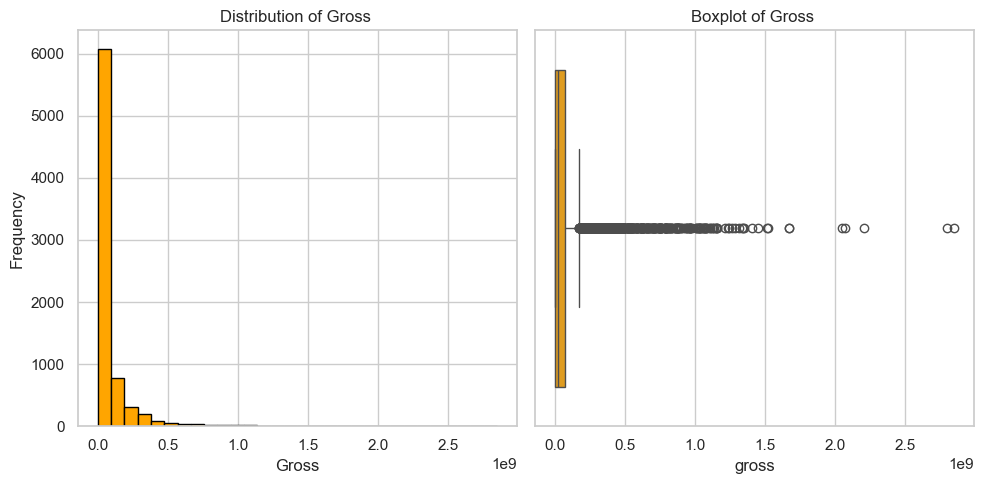

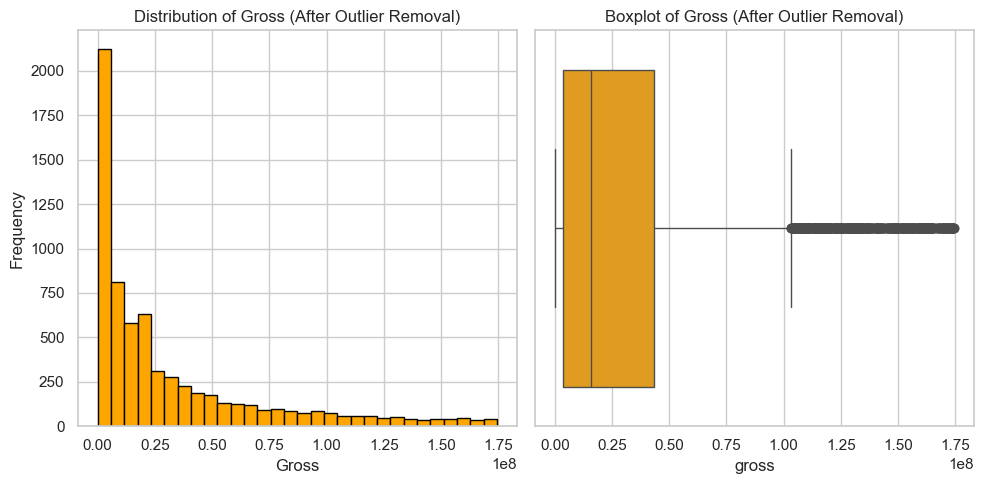

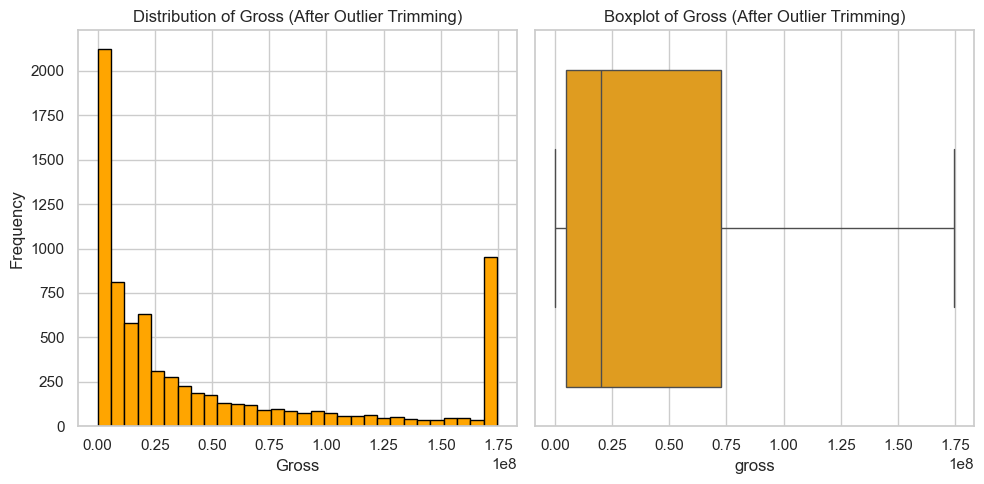

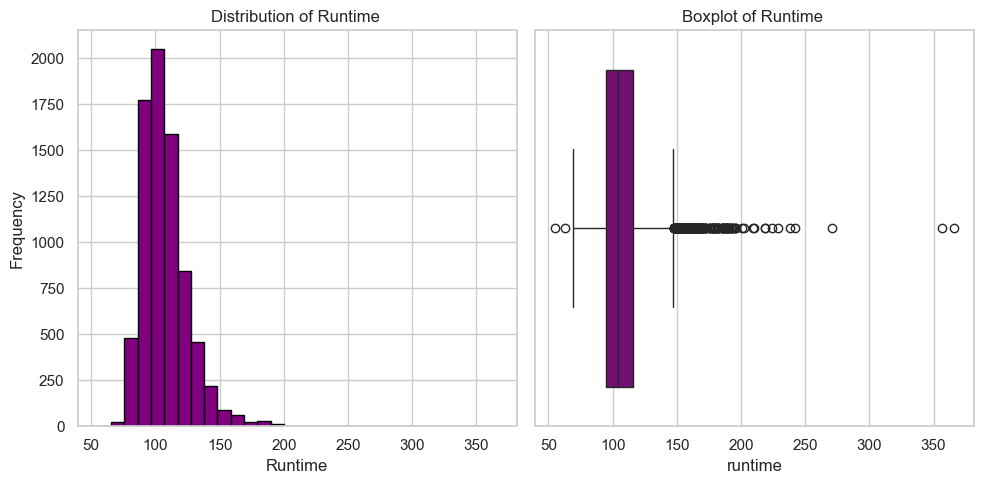

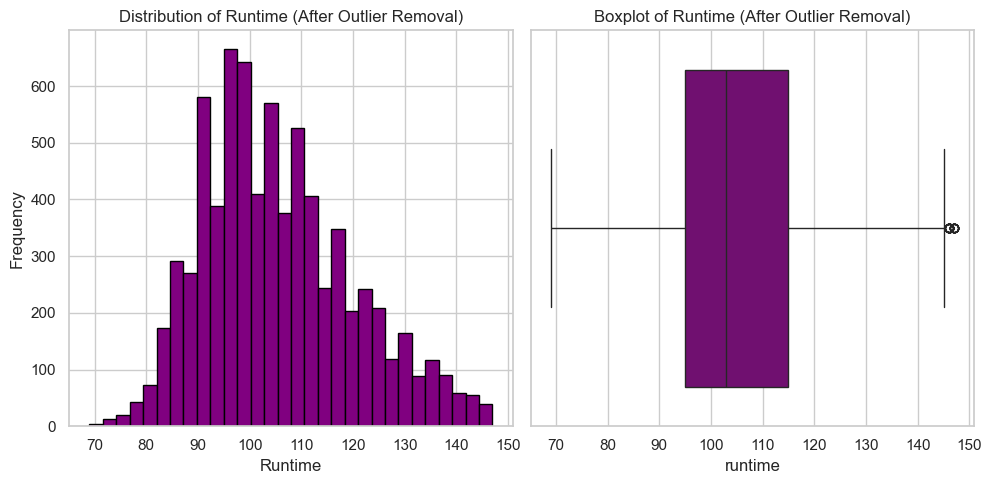

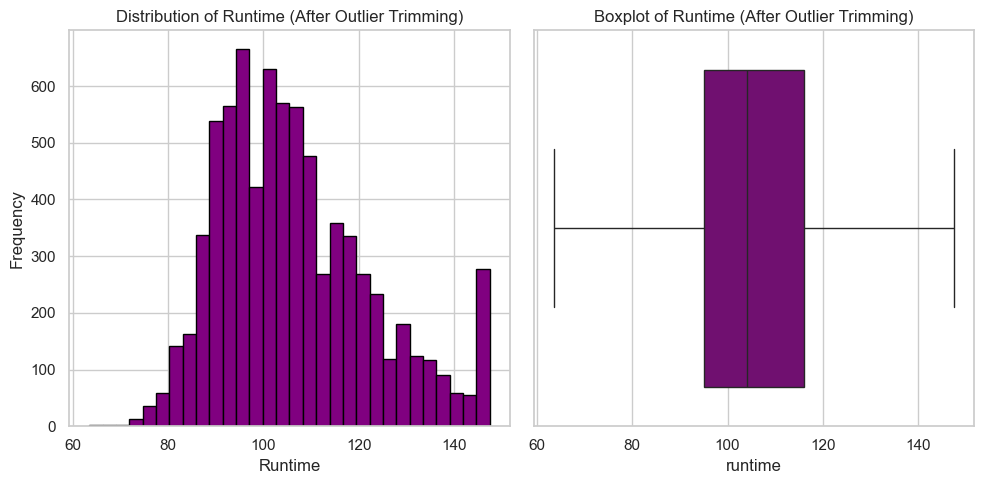

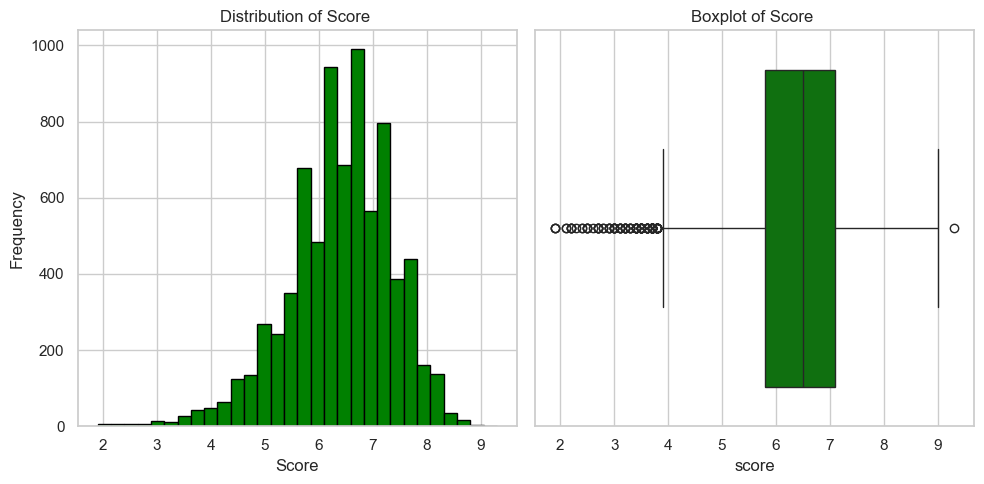

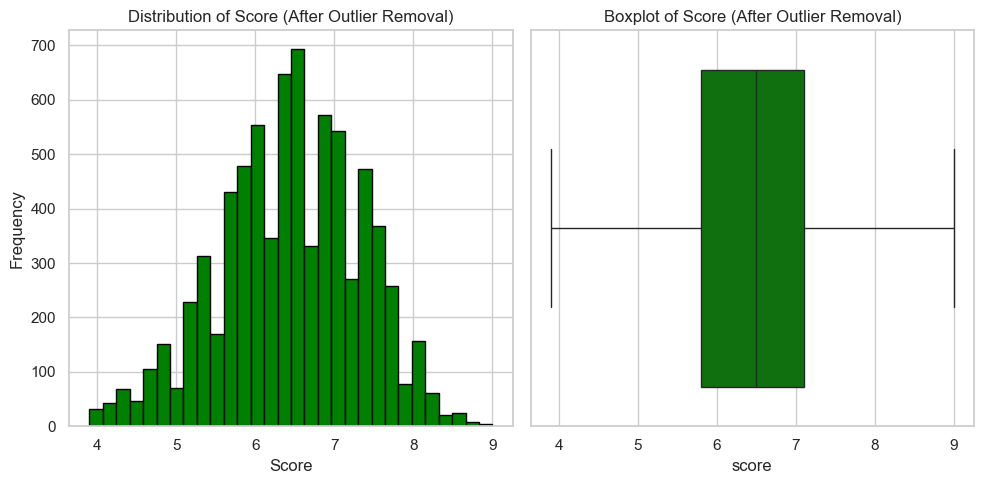

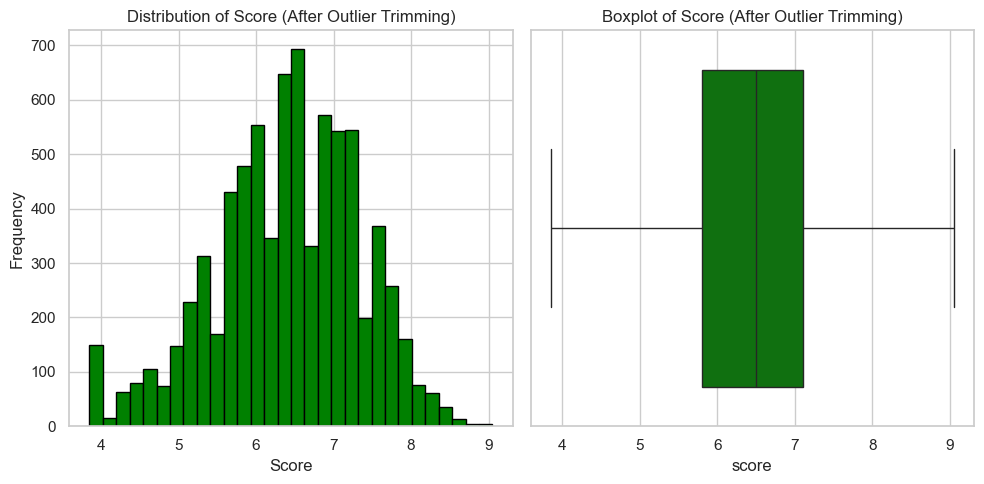

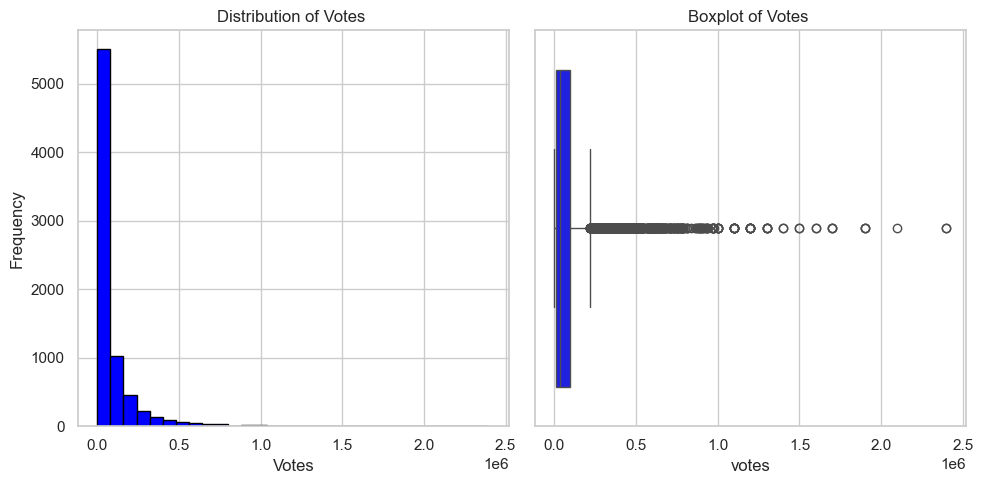

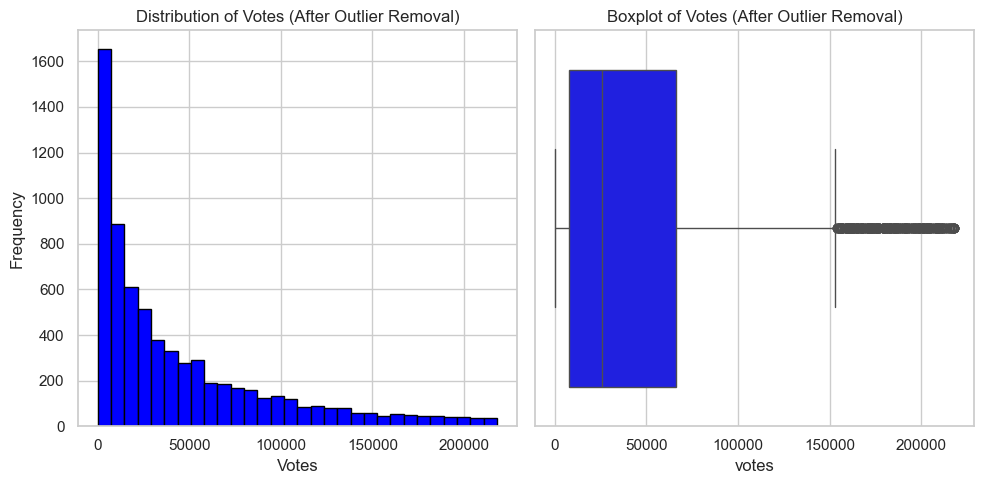

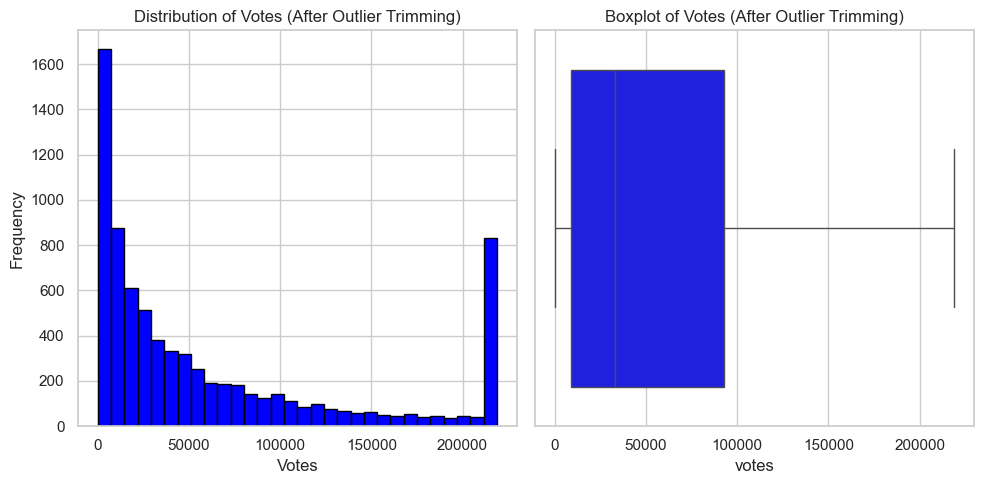

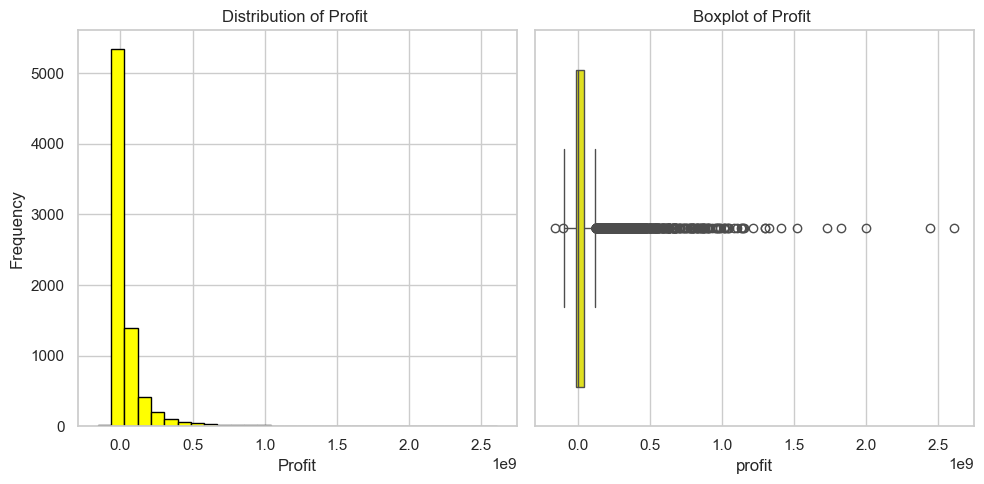

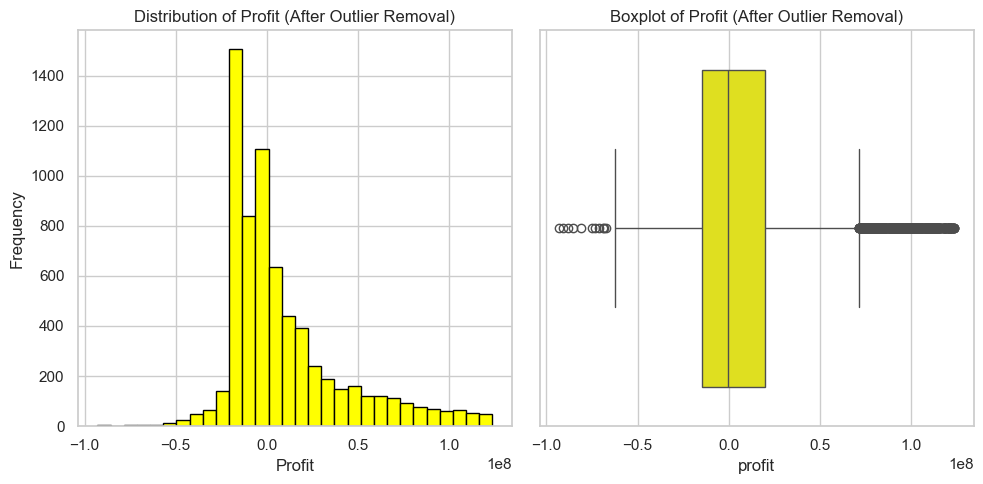

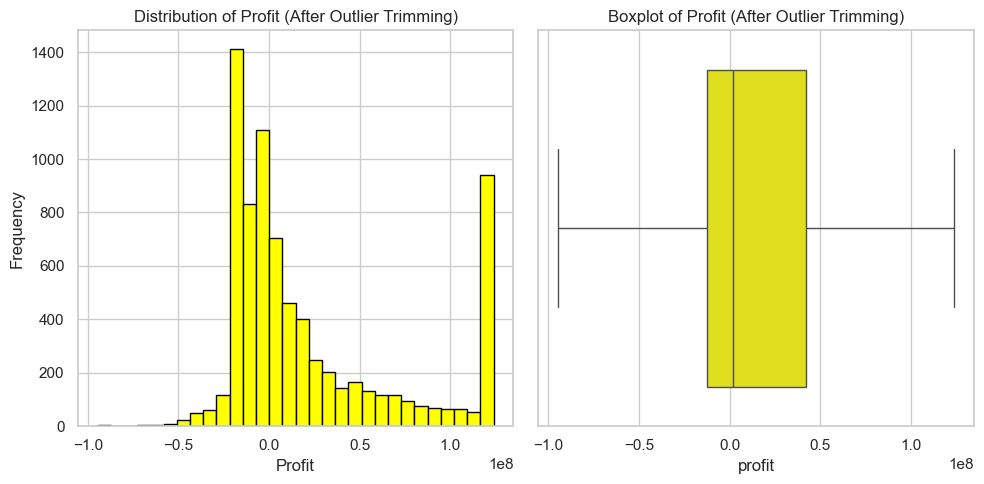

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = pd.read_csv('clean_movies.csv')
sns.set(style="whitegrid")

# Define columns and their corresponding colors
columns = {
    'budget': 'skyblue',
    'gross': 'orange',
    'runtime': 'purple',
    'score': 'green',
    'votes': 'blue',
    'profit': 'yellow'
}

# Function to plot distributions and boxplots
def plot_distribution_and_boxplot(df, column, color, title_suffix=''):
    plt.figure(figsize=(10, 5))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    df[column].plot(kind='hist', bins=30, color=color, edgecolor='black')
    plt.title(f'Distribution of {column.capitalize()} {title_suffix}')
    plt.xlabel(column.capitalize())
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color=color)
    plt.title(f'Boxplot of {column.capitalize()} {title_suffix}')
    
    plt.tight_layout()
    plt.show()

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Function to trim outliers using IQR method
def trim_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Iterate over columns to plot in groups
for column, color in columns.items():
    # Original data
    plot_distribution_and_boxplot(df, column, color)
    
    # After removing outliers
    df_clean = remove_outliers_iqr(df, column)
    plot_distribution_and_boxplot(df_clean, column, color, title_suffix='(After Outlier Removal)')
    
    # After trimming outliers
    df_trimmed = trim_outliers_iqr(df.copy(), column)
    plot_distribution_and_boxplot(df_trimmed, column, color, title_suffix='(After Outlier Trimming)')


In [ ]:
#Discussion

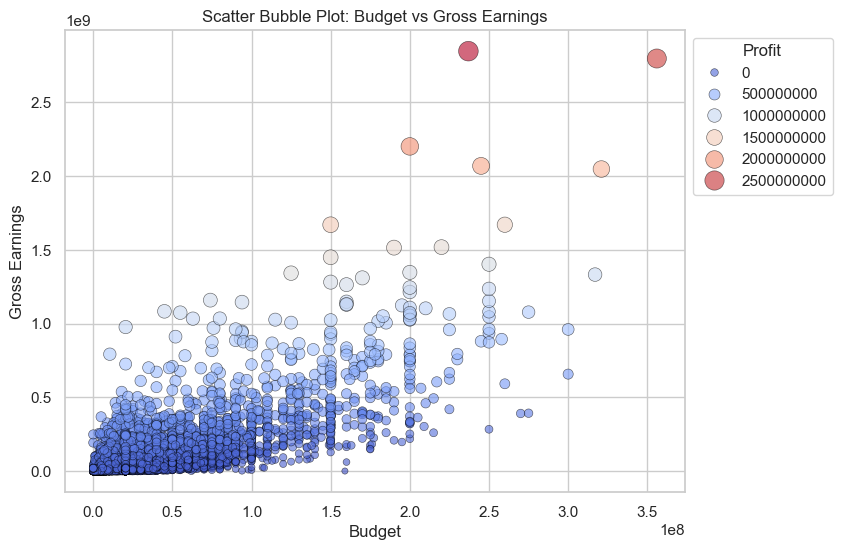

In [89]:
# 1. Does a higher budget lead to higher box office returns?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('clean_movies.csv')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='gross', size='profit', data=df, hue='profit', palette='coolwarm', edgecolor='black', sizes=(20, 200), alpha=0.6)
plt.title('Scatter Bubble Plot: Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.legend(title='Profit', bbox_to_anchor=(1, 1))
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_728\4171689446.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index=score_bins, columns=profit_bins, values='profit', aggfunc='mean')


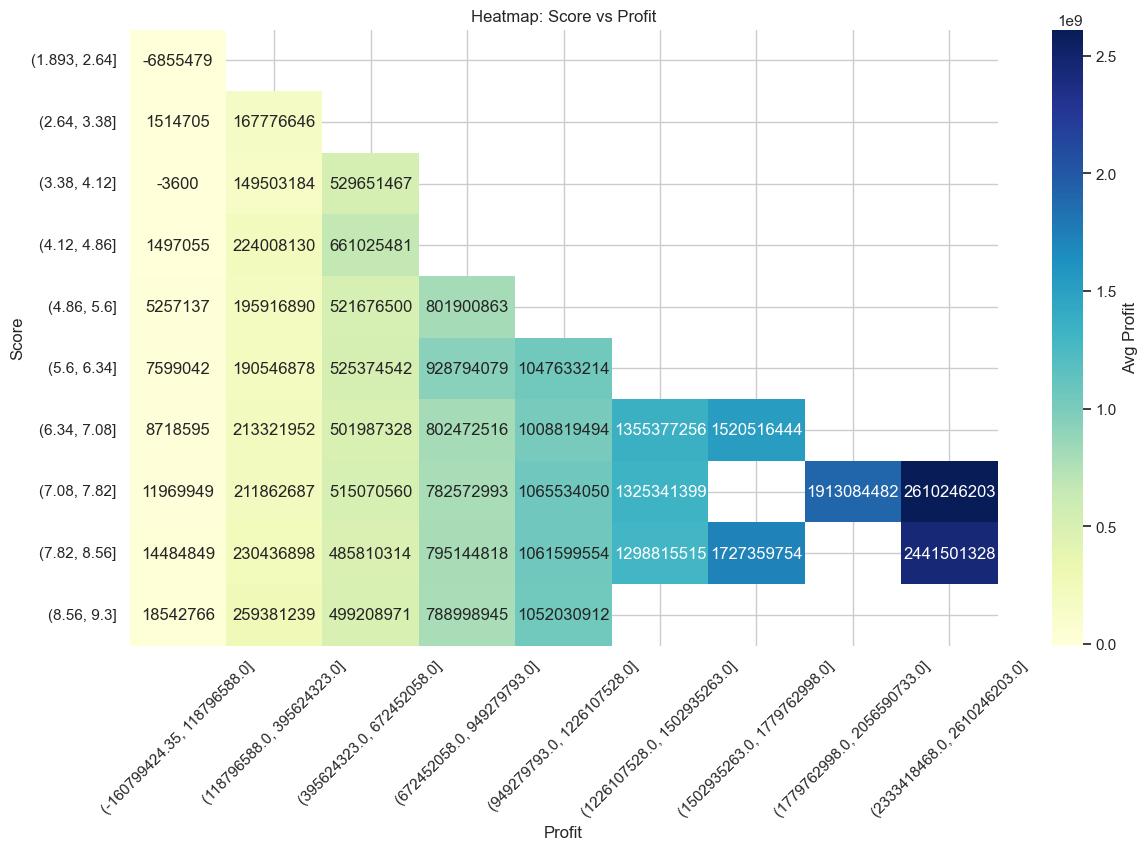

In [65]:
# 2. Does the IMDb score correlate with the movie’s box office success?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('clean_movies.csv')

# Create bins for score and gross
score_bins = pd.cut(df['score'], bins=10)
profit_bins = pd.cut(df['profit'], bins=10)

# Create a pivot table with average profit for each score bin
heatmap_data = df.pivot_table(index=score_bins, columns=profit_bins, values='profit', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Avg Profit'})
plt.title('Heatmap: Score vs Profit')
plt.xlabel('Profit')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


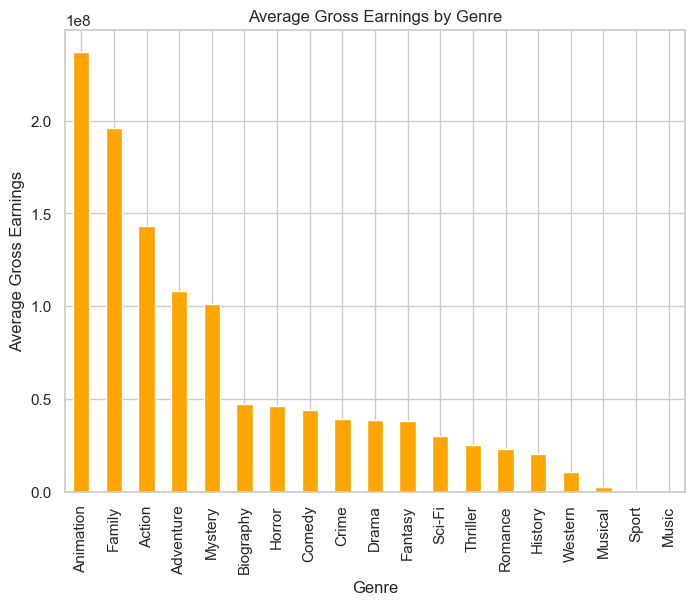

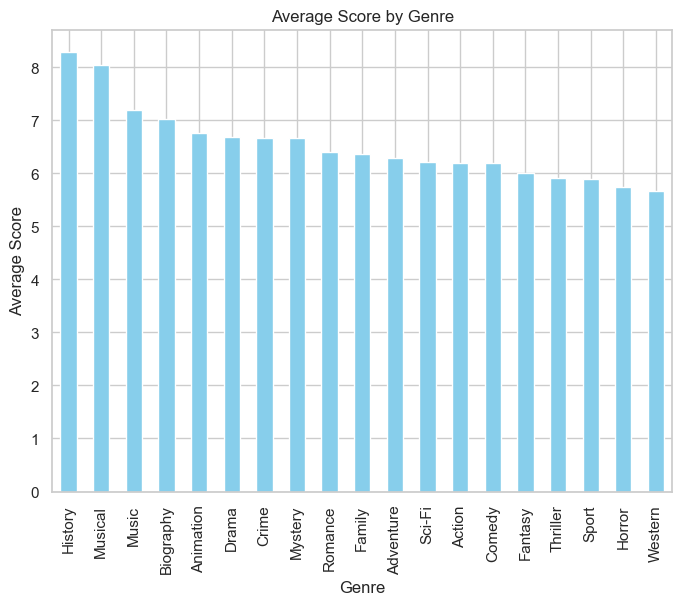

In [61]:
# 3. What are the most successful genres in terms of box office gross and scores?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('clean_movies.csv')

# Average Gross Earnings by Genre:
plt.figure(figsize=(8, 6))
avg_gross_by_genre = df.groupby('genre')['gross'].mean().sort_values(ascending=False)
avg_gross_by_genre.plot(kind='bar', color='orange')
plt.title('Average Gross Earnings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Gross Earnings')
plt.show()

# Average Score by Genre
plt.figure(figsize=(8, 6))
avg_score_by_genre = df.groupby('genre')['score'].mean().sort_values(ascending=False)
avg_score_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.show()


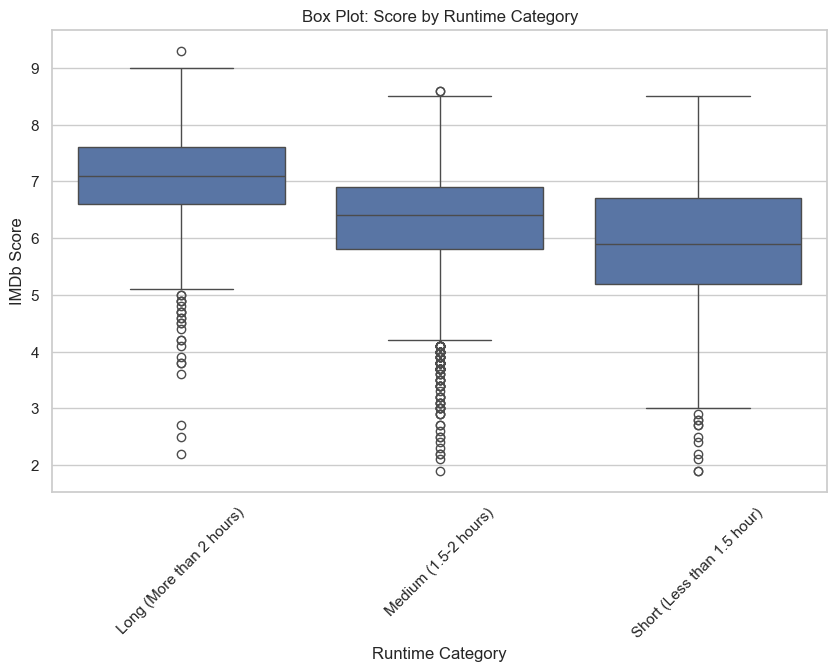

In [3]:
# 4. How do movie runtimes influence audience ratings?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('clean_movies.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='runtime_category', y='score', data=df)
plt.title('Box Plot: Score by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()